# DECISION TREE

Decision Tree adalah metode dari Supervised Learning yang digunakan untuk klasifikasi dan regresi. Decision Tree membagi dataset menjadi beberapa bagian(subset) yang nantinya akan dijadikan parameter untuk menentukan label terhadap dataset.

Keuntungan 
1. mudah untuk dimengerti, visualisasi, dan diinterpretasikan
2. tidak perlu usaha lebih untuk memproses data
3. sangat kuat dalam menangani categorical data
4. secara implisit menggunakan feature selection.

Kerugian
1. resiko besar untuk overfitting, jika terdapat banyak outliers
2. Variance yang cukup besar, karena variasi pada dataset sangat kecil
3. mengubah parameter-parameter untuk meningkatkan akurasi pada decision tree, beresiko membuat model menjadi bias, sehingga model akan sulit bekerja pada dataset yang baru

Decision Tree terbagi root node, decision node, dan leaf node.

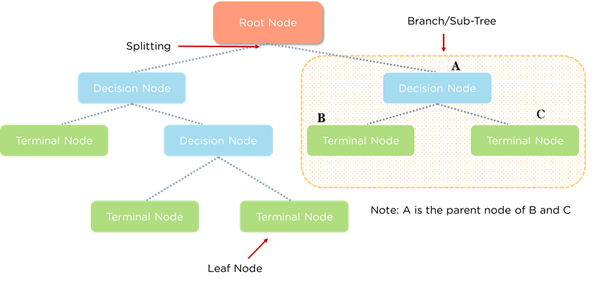

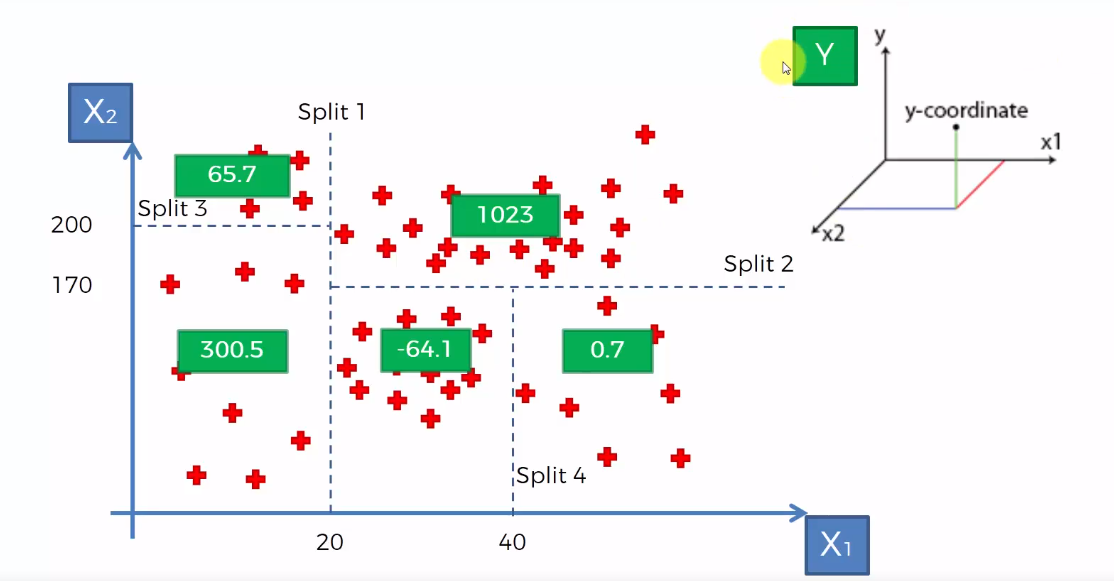

Untuk perlu lebih tahu mendalam tentang Decision Tree, terlebih dahulu kita harus memahami Entropy dan Information Gain

Entropy adalah metric untuk mengukur tingkat random/kekotoran pada suatu dataset. Semakin data displit, maka nilai entropy akan semakin kecil.
<br>Information gain adalah  pengukuran tingkat seberapa besar  selisih antara entropy sebelum data split dan sesudah displit.

Berikut rumus dari entropy


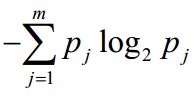

 p = peluang, <br>j = subset data, <br>m = banyaknya subset yang akan displit

Selain Entropy, CART menggunakan Gini Index untuk mengevaluasi splitpoint pada dataset
<br>Gini Index memberikan skor terhadap pemisahan/split terhadap suatu classes.

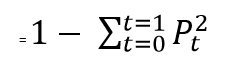

jika target mempunyai lebih dari 2 kategori, maka:

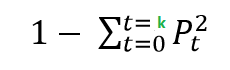

minimum gini index jika bernilai 0 maka artinya semua observasi hanya menuju ke 1 label
<br>
nilai yang sempurna untuk klasifikasi biner adalah 0.5

Langkah-langkah menentukan gini index:
1. Hitung gini index pada dataset
2. pada tiap fitur, hitung gini index pada setiap nilai, ambil nilai rata-rata pada attribute yang sudah di split, kemudian hitung gini gain.
3. pilih gini gain yang terbesar.
4. ulang sampai mendapatkan parameter yang terbaik

Contoh menghitung gini index

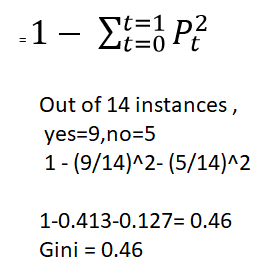

Gambar dibawah ini hasil seleksi yang dilakukan algoritma Decision tree dengan menggunakan gini index

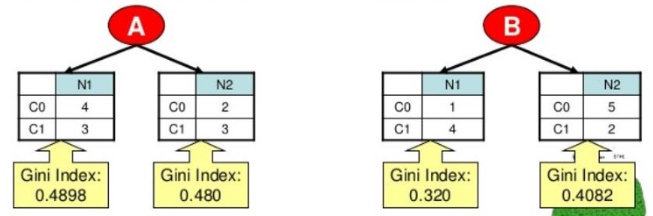

berdasarkan gambar diatas, gini index yang dipilih adalah Tree A, karena mempunyai rata2 gini index tertinggi(mendekati 0.5)

# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

# Modelling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [3]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [4]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [8]:
accuracy_score(y_test, y_pred)

0.91

# Visualisasi

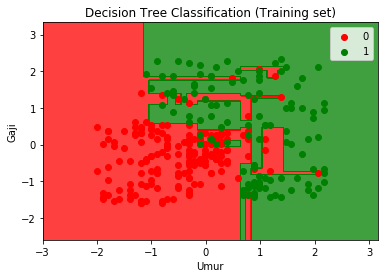

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

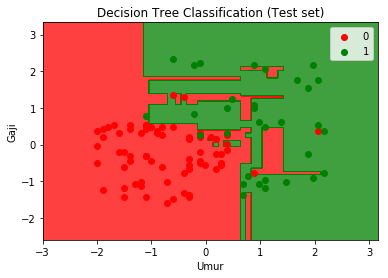

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

Decision Tree menghasilkan akurasi yang sangat baik dalam dataset ini. Teknik ini bisa bekerja lebih optimal jika dataset bersifat kategori. Namun hal-hal yang harus diperhatikan adalah masalah overfitting dan underfitting. ada beberapa teknik yang lebih baik dari Decision Tree dalam menangani overfitting dan underfitting, dan salah satu yang akan kita bahas di chapter selanjutnya adalah Random Forest.